Naufal Afthar Razzan - 2440083134 - LB07

In [2]:
import pandas as pd

clust = pd.read_csv('Mall_Customers.csv')
clust

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [53]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
clust1 = clust.copy()
clust1['Genre'] = LabelEncoder().fit_transform(clust1['Genre'])
clust1

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [54]:
import numpy as np
x = clust1.iloc[:, 1:]

x = np.array(x)

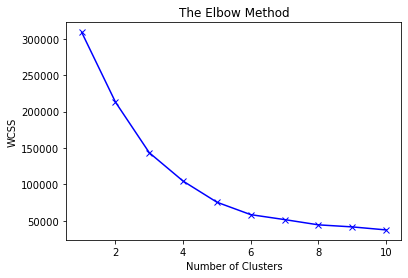

In [56]:
# get optimal number of clusters using elbow method
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

plt.plot(range(1, 11), cs, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

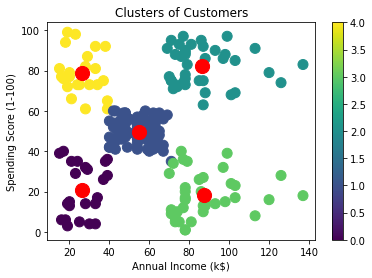

In [58]:
# visualization with 5 clusters
kmeans = KMeans(n_clusters = 5, random_state = 123)
kmeans.fit(x)

out = plt.scatter(x[:, 2], x[:, 3], s = 100, c = kmeans.labels_, marker = 'o', alpha = 1)
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 2], centers[:, 3], c = 'red', s = 200, alpha = 1, marker = 'o')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.colorbar(out)

plt.show()